In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

## 머신러닝의 종류

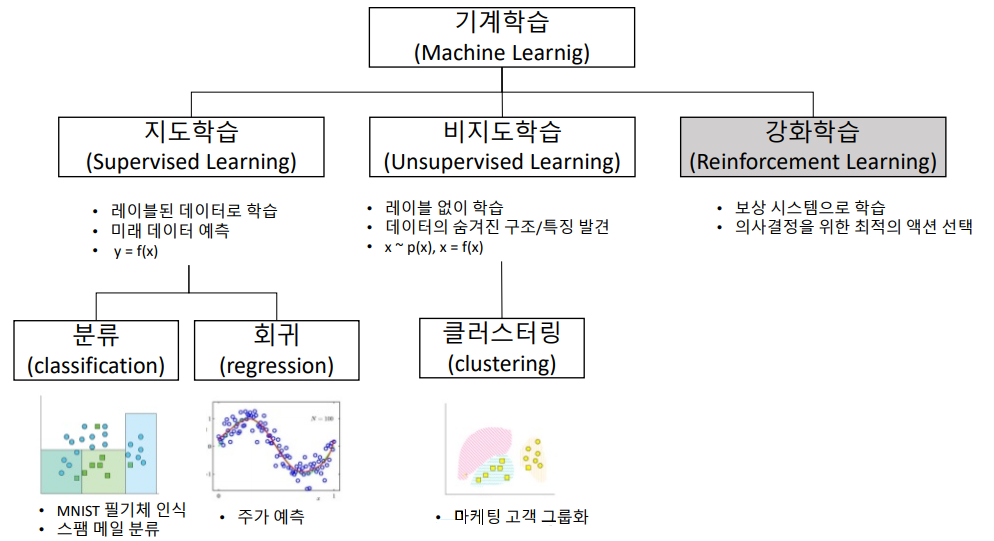

- 이미지 출처 : https://bestpractice80.tistory.com/2

# 분류(Classification)란?

#### 1. 가정해보기

우리는 꽃집을 운영하고 있습니다.    
우리가 가진 데이터는 꽃잎의 길이, 넓이, 꽂받침의 길이와 넓이 데이터입니다.   
이것만으로 꽃의 품종을 구분할 수 있을까요?


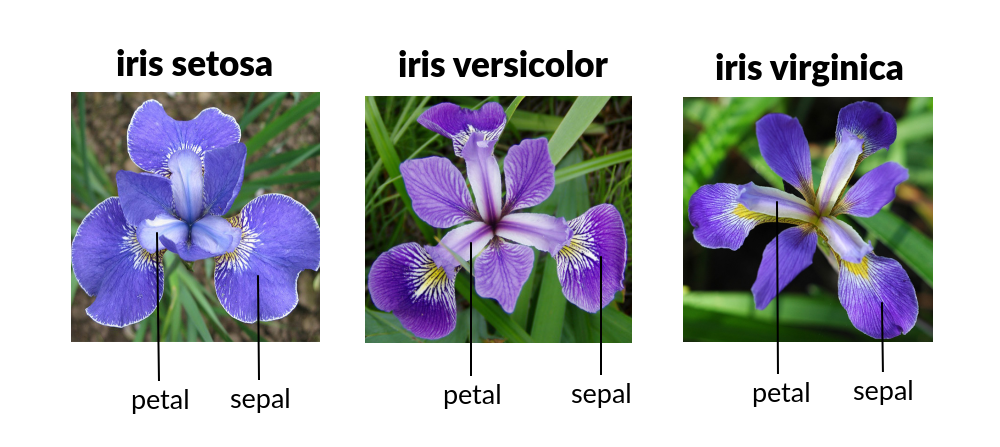

- 문제 정의
    - 데이터 : petal(꽃잎)의 길이, 꽃잎의 넓이, sepal(꽃받침)의 길이, 꽃받침의 넓이에 따른 붓꽃의 품종(Y)
    - 목표 : 데이터에 따른 품종 예측하기
- 해결 방안
    - 분류 알고리즘 활용

- 분류란?
    - 주어진 입력값이 어떤 클래스에 속할지에 대한 결과값을 도출하는 알고리즘
    - 다양한 분류 알고리즘이 존재하며, 예측 목표와 데이터 유형에 따라 적용

## 1. Logistic Regression (로지스틱 회귀)

분류 문제를 회귀 알고리즘으로 풀 수 있을까요?    
일단 가장 간단한 이진분류라고 생각해봅시다.

### 랜덤한 데이터 만들기

랜덤한 데이터를 만들어보겠습니다

In [2]:
from sklearn.datasets import make_classification # 가짜 데이터 만들어주는 라이브러리


X, y = make_classification(n_samples = 100, n_classes = 2, n_features = 1, n_redundant= 0,
                           n_informative = 1, n_clusters_per_class = 1,
                           random_state = 30)

X.shape, y.shape

((100, 1), (100,))

- n_samples : data의 수, 기본값은 100
- n_features : feature의 수, 기본값은 20
- n_informative : 독립변수중 종속변수와 상관관계가 있는 성분의 수(y와 관련이 있는 x의 수), 기본값은 2
- n_redundant : 다른 독립변수들의 선형조합으로 만들어지는 독립변수의 수(다른 x들의 선형조합으로 만들어 지는 x의 수), 기본값은 2
- n_classes : 종속변수의 class 수, 기본값은 2 (이진 데이터)
- n_clusters_per_class : 각 클래스당 클러스터 수, 기본값은 2, 클래스당 클러스터 수를 늘리게 되면 클래스 끼리 잘 분리되지 않은 상태의 데이터를 생성하게 된다

In [3]:
y

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1])

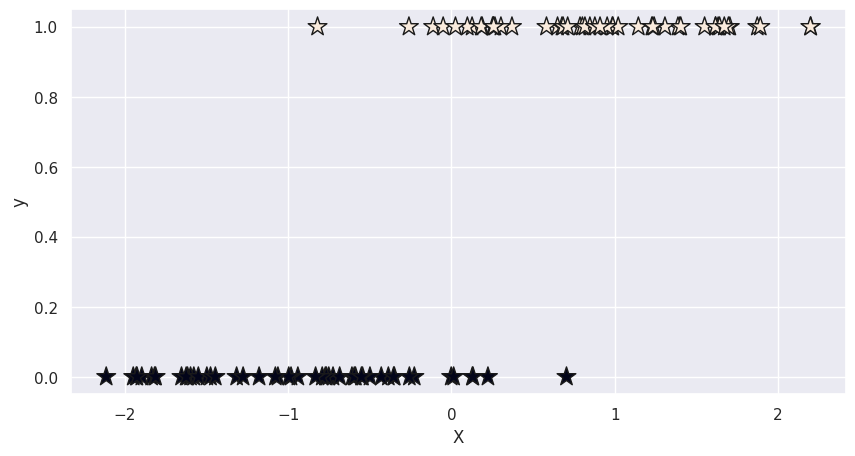

In [4]:
plt.figure(figsize = (10,5))
plt.scatter(X, y, c=y, marker = '*', s=200, edgecolors='k') # k = black
plt.xlabel('X')
plt.ylabel('y')
plt.show()

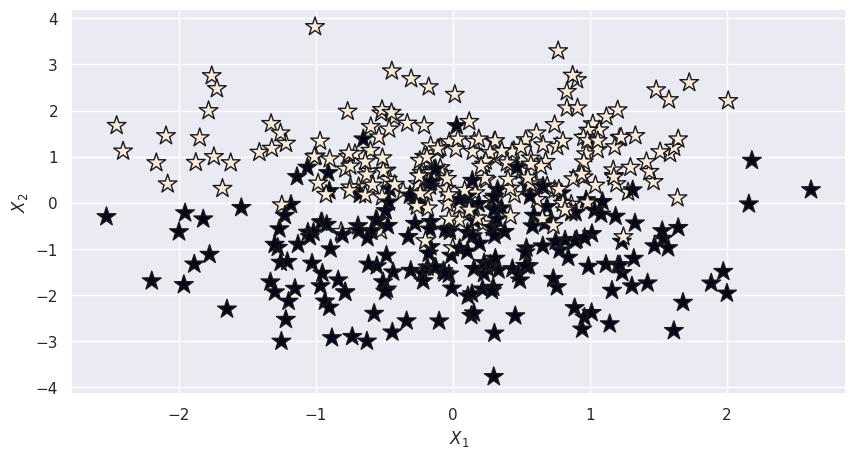

In [5]:
X, y = make_classification(n_samples = 400, n_features = 2, n_redundant = 0,
                          n_informative = 1, n_clusters_per_class = 1,
                          random_state = 30)
# 독립변수, 즉 n_features를 2로 설정한 데이터를 그래프로 그려보았다.
plt.figure(figsize = (10, 5))
plt.scatter(X[:, 0], X[:, 1], marker = '*', c = y, s = 200, edgecolors= "k")
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')

plt.show()

### Logistic Regression  기본

분류는 2개의 카테고리 데이터를 분류하는 선형 **Decision Boundary**를 찾는 것이 목적이다.


- 시그모이드 함수(Sigmoid Function)


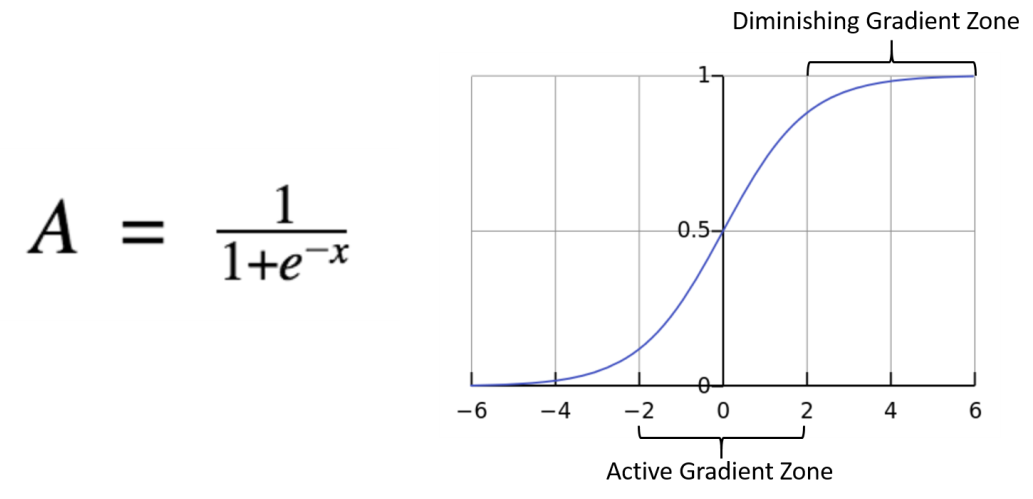

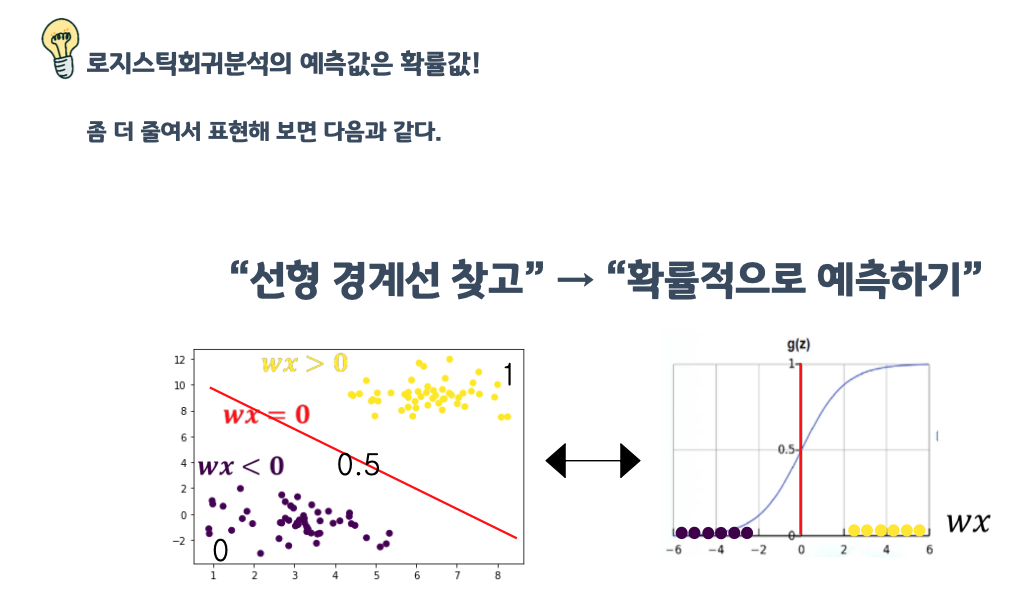

로지스틱 모델 객체를 생성하겠습니다.
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression

In [6]:
# 모델 불러오기
from sklearn.linear_model import LogisticRegression

In [7]:
# 모델 객체 만들기
log_reg = LogisticRegression()

In [8]:
# 학습시키기
log_reg.fit(X,y)

LogisticRegression()

In [9]:
# Prediction과 y값 10개만 비교해보기
log_reg.predict(X)[:10], y[:10]

(array([1, 0, 1, 0, 0, 1, 1, 1, 1, 0]), array([1, 0, 1, 0, 0, 1, 1, 1, 1, 0]))

In [11]:
log_reg.score(X,y,) # 기본은 정확도이다

0.8625

In [12]:
# 기울기와 절편 출력하기
log_reg.coef_, log_reg.intercept_

(array([[0.01827322, 2.55005068]]), array([-0.05282522]))

In [ ]:
#decision function의 결과 예측하기
log_reg.predict(X)

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,

In [19]:
prob_pred = log_reg.predict_log_proba(X)[:20] #로지스틱은 확률을 구하니까, 확률은 얼마?
prob_pred

array([[-1.89365327e+00, -1.63131953e-01],
       [-6.15893791e-01, -7.76872090e-01],
       [-3.24598676e+00, -3.97081679e-02],
       [-3.19780539e-02, -3.45865185e+00],
       [-1.61061751e-01, -1.90541768e+00],
       [-1.47779721e+00, -2.58951676e-01],
       [-9.66393588e+00, -6.35359856e-05],
       [-2.55963557e+00, -8.04868002e-02],
       [-3.35087649e+00, -3.56827404e-02],
       [-8.79016322e-04, -7.03714657e+00],
       [-1.41323587e+00, -2.78860488e-01],
       [-5.93415245e+00, -2.65097640e-03],
       [-2.85773412e-02, -3.56939578e+00],
       [-5.19706786e-01, -9.03115151e-01],
       [-1.86088577e+00, -1.69051753e-01],
       [-3.98764203e-03, -5.52654835e+00],
       [-2.43241253e-02, -3.72842402e+00],
       [-1.78969497e+00, -1.82734969e-01],
       [-2.56554476e-01, -1.48595049e+00],
       [-9.71127353e-01, -4.75870274e-01]])

In [20]:
np.argmax(prob_pred, axis = 1)

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1])

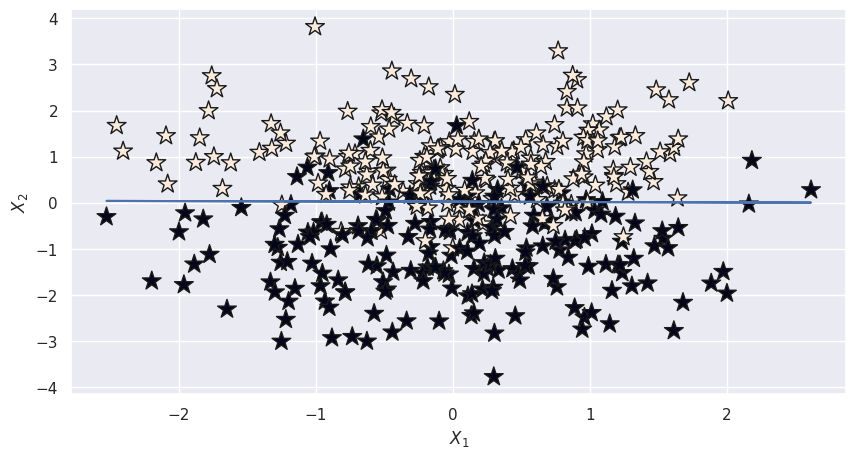

In [22]:
X, y = make_classification(n_samples = 400, n_features = 2, n_redundant = 0,
                          n_informative = 1, n_clusters_per_class = 1,
                          random_state = 30)
# 독립변수, 즉 n_features를 2로 설정한 데이터를 그래프로 그려보았다.
plt.figure(figsize = (10, 5))
plt.scatter(X[:, 0], X[:, 1], marker = '*', c = y, s = 200, edgecolors= "k")
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')

W = log_reg.coef_

X_2 = -(W[0][0]*X[:, 0] + log_reg.intercept_[0]) / W[0][1]
plt.plot(X[:, 0], X_2)

plt.show()

### 모델 평가하기

In [23]:
# 정확도
log_reg.score(X, y) # 편의를 봐줌

0.8625

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [26]:
accuracy_score(y, log_reg.predict(X)) # 실제값, 예측값 넣어줘야 함

0.8625

In [27]:
log_reg.score(X, y)

0.8625

In [28]:
precision_score(y, log_reg.predict(X))

0.8571428571428571

In [29]:
recall_score(y, log_reg.predict(X))

0.87

In [31]:
from sklearn.metrics import confusion_matrix # Truepos, Falsepos, Trueneg, Falseneg
confusion_matrix(y, log_reg.predict(X))      #          Type1 error        Type2 error

array([[171,  29],
       [ 26, 174]])

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y, log_reg.predict(X))) # 0을 기준으로 한번, 1을 기준으로 한번 한다

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       200
           1       0.86      0.87      0.86       200

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



###### 다중분류

multi-label classification

multi-modal : 자연어, 이미지, 사운드

multi-task : 분류, 회귀, 생성, 추천

multi-class : 너무 길어 생략

In [35]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 100, n_classes = 3, n_features = 2, n_redundant= 0,
                           n_informative = 2, n_clusters_per_class = 1,
                           random_state = 30)

X.shape, y.shape

((100, 2), (100,))

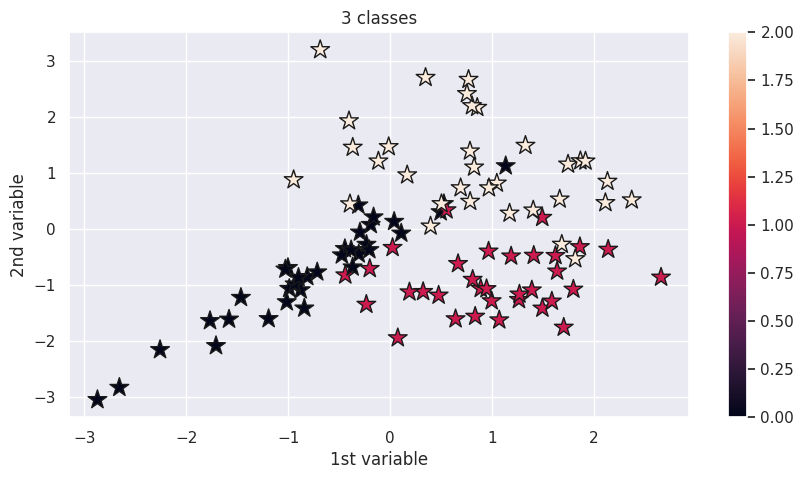

In [36]:
plt.figure(figsize=(10,5))
plt.scatter(X[:,0], X[:,1], marker = '*', c = y, edgecolors='k', s=200)
plt.title('3 classes')
plt.xlabel('1st variable')
plt.ylabel('2nd variable')
plt.colorbar()
plt.show()

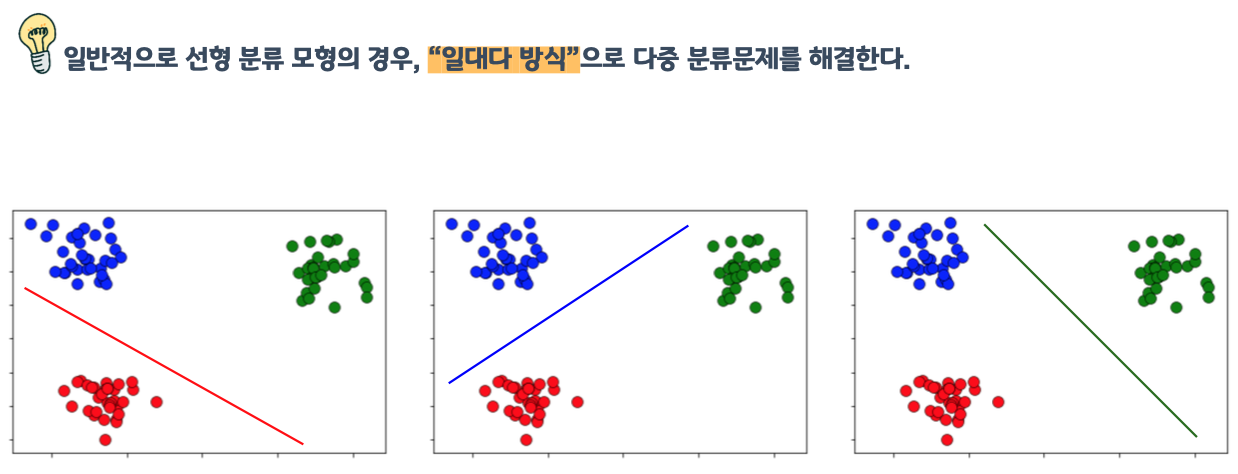

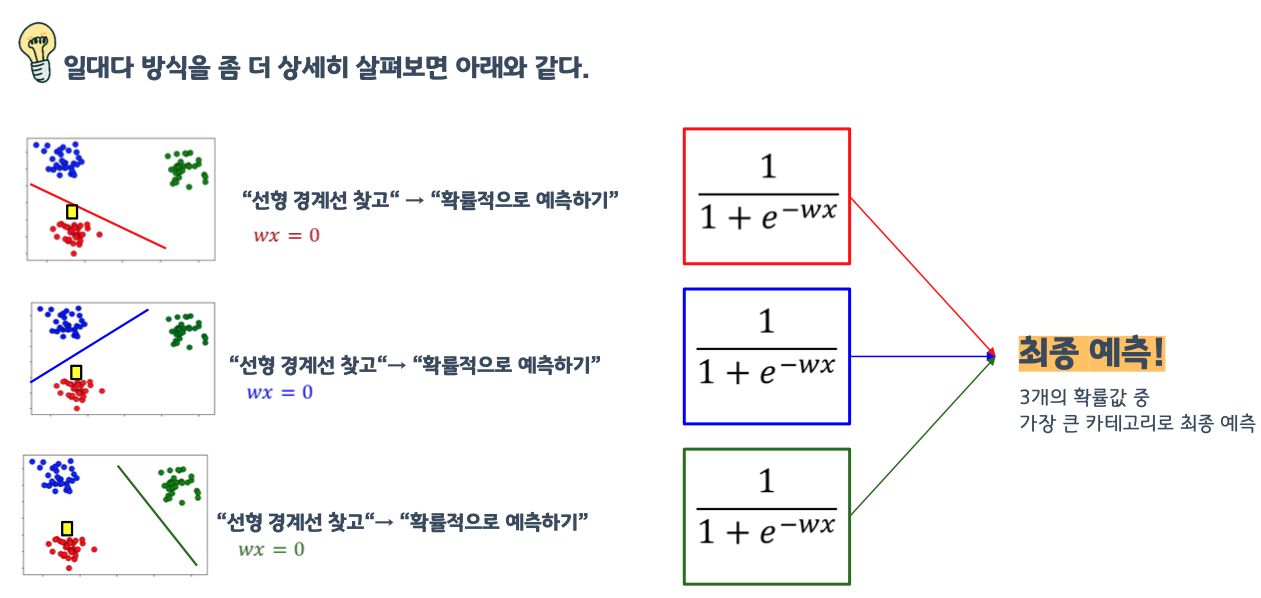

로지스틱 모델 객체를 생성하겠습니다.
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression

In [37]:
# 모델 불러오기
from sklearn.linear_model import LogisticRegression

In [38]:
# 모델 객체 만들기
log_reg = LogisticRegression()

In [39]:
# 학습시키기
log_reg.fit(X,y)

LogisticRegression()

In [42]:
# Prediction과 y값 10개만 비교해보기
log_reg.predict(X)[:10], y[:10]

(array([0, 0, 2, 2, 2, 0, 0, 0, 1, 2]), array([0, 0, 2, 2, 2, 0, 0, 0, 1, 2]))

In [43]:
# 기울기와 절편 출력하기
log_reg.coef_, log_reg.intercept_

(array([[-1.54156056, -0.13925454],
        [ 0.95239809, -1.73918762],
        [ 0.58916247,  1.87844216]]),
 array([ 0.75420226, -0.60334438, -0.15085789]))

In [44]:
#decision function의 결과 예측하기
log_reg.predict(X)

array([0, 0, 2, 2, 2, 0, 0, 0, 1, 2, 2, 0, 0, 2, 1, 2, 0, 2, 0, 0, 2, 2,
       0, 1, 0, 2, 0, 0, 1, 2, 0, 2, 1, 2, 2, 0, 1, 2, 1, 0, 1, 1, 2, 2,
       1, 0, 0, 0, 0, 1, 2, 0, 0, 2, 2, 1, 1, 2, 2, 0, 2, 2, 1, 1, 0, 2,
       1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 2, 1, 2,
       1, 2, 0, 2, 2, 1, 1, 1, 2, 1, 1, 0])

In [52]:
log_reg.predict_log_proba(X)[:10] #로지스틱은 확률을 구하니까, 확률은 얼마?
np.argmax(log_reg.predict_log_proba(X), axis = 1)

array([0, 0, 2, 2, 2, 0, 0, 0, 1, 2, 2, 0, 0, 2, 1, 2, 0, 2, 0, 0, 2, 2,
       0, 1, 0, 2, 0, 0, 1, 2, 0, 2, 1, 2, 2, 0, 1, 2, 1, 0, 1, 1, 2, 2,
       1, 0, 0, 0, 0, 1, 2, 0, 0, 2, 2, 1, 1, 2, 2, 0, 2, 2, 1, 1, 0, 2,
       1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 2, 1, 2,
       1, 2, 0, 2, 2, 1, 1, 1, 2, 1, 1, 0])

In [49]:
# 정확도
log_reg.score(X, y)

0.88

In [48]:
print(classification_report(y, log_reg.predict(X)))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89        34
           1       0.93      0.85      0.89        33
           2       0.85      0.88      0.87        33

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100



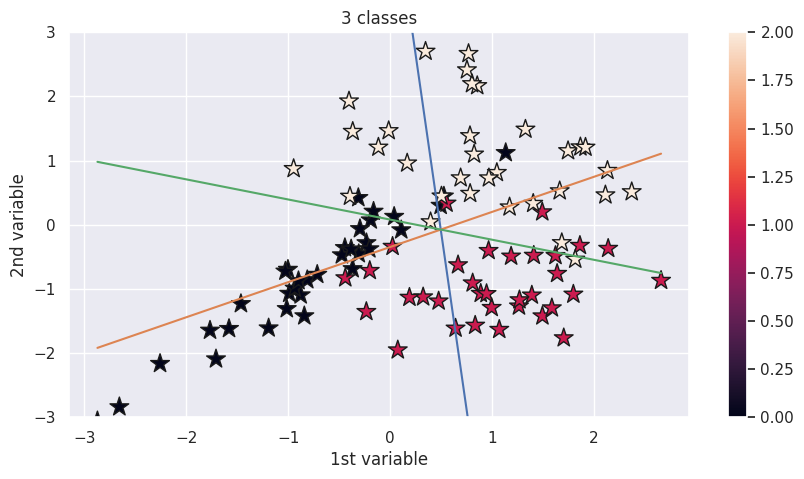

In [51]:
# 결과 시각화 하기

plt.figure(figsize=(10,5))
plt.scatter(X[:,0], X[:,1], marker = '*', c = y, edgecolors='k', s=200)
plt.title('3 classes')
plt.xlabel('1st variable')
plt.ylabel('2nd variable')

W = log_reg.coef_

X_1 = np.linspace(X[:,0].min(), X[:, 0].max()) # 50개가 default


# WX = 0인 지점 => W1X1 + W2X2 + W0 = 0
# X2 = -(W1X1 + W0) / W2

for i in range(3):
    X_2 = -(W[i][0]*X_1 + log_reg.intercept_[i]) / W[i][1]
    plt.plot(X_1, X_2)

plt.ylim(-3, 3)
plt.colorbar()
plt.show()

## 실제 데이터에 적용하기

In [53]:
# 데이터 준비
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_data = load_iris()
X = iris_data.data
y = iris_data.target

In [54]:
# 데이터의 특성 확인하기
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
# y 데이터 클래스 확인하기
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### EDA

In [ ]:
X

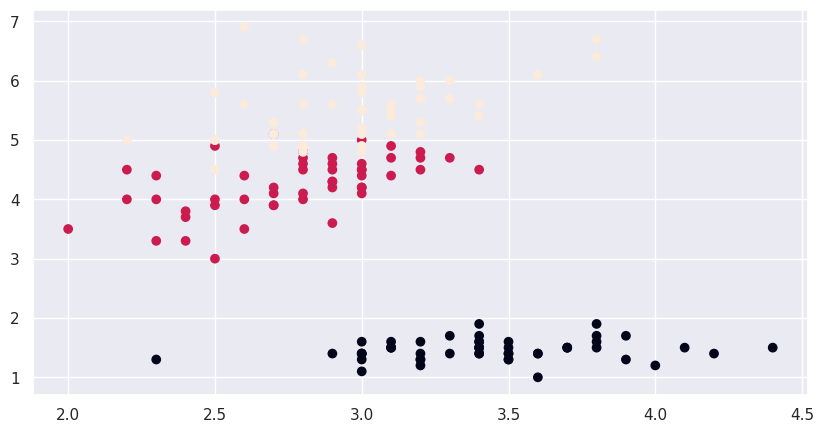

In [63]:
# 산점도 출력하기
plt.figure(figsize = (10,5))

plt.scatter(X[:,1], X[:,2], c = y)

plt.show()

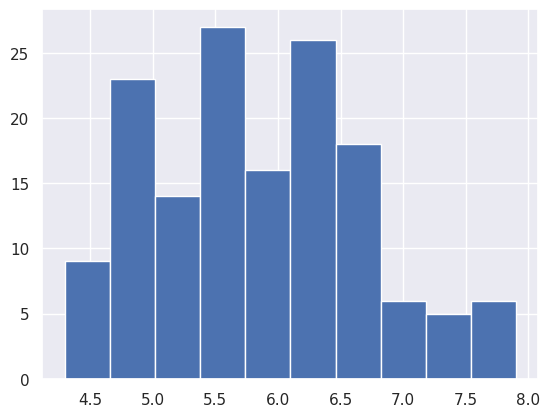

In [59]:
plt.hist(X[:,0])
plt.show()

수치형 - scaling - standard(평균, 표준편차), min-max(최대, 최소), robust(중위값, IQR)

카테고리형 - encoding

In [67]:
# 데이터 스케일링 하기

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)


In [68]:
# 학습데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   stratify = iris_data.target,
                                                     shuffle = True, random_state = 52)

In [71]:
# 로지스틱 회귀 학습시키기
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

LogisticRegression()

In [72]:
# 학습데이터 스코어
log_reg.score(X_train, y_train)

0.9642857142857143

In [73]:
# 테스트 데이터 스코어
log_reg.score(X_test, y_test)

0.9736842105263158

## 모델 평가하기

In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [75]:
accuracy_score(y_test, log_reg.predict(X_test))

0.9736842105263158

In [76]:
log_reg.score(X_test, y_test)

0.9736842105263158

In [78]:
# precision_score, recall_score를 호출할 시에는 average 파라메터를 "macro"로 세팅을 해주면, "평균"을 의미한다.

precision_score(y_test, log_reg.predict(X_test), average = 'macro')

0.9761904761904763

In [79]:
recall_score(y_test, log_reg.predict(X_test), average = 'macro')

0.9722222222222222

In [80]:
confusion_matrix(y_test, log_reg.predict(X_test))

array([[13,  0,  0],
       [ 0, 13,  0],
       [ 0,  1, 11]])

In [77]:
print(classification_report(y, log_reg.predict(X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.96      0.95        50
           2       0.96      0.94      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [ ]:
# 하이퍼 파라미터 최적화 - 튜닝
# gridsearch, cross-validation
# GridsearchCV

# 직접 해보기

이 데이터는 와인의 등급을 나눈 데이터입니다. 데이터를 통해 와인의 등급을 분류해보세요!

In [81]:
from sklearn.datasets import load_wine
data = load_wine()

In [90]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [ ]:
print(data.DESCR)

In [83]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [91]:
df['target'] = data.target

In [ ]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


### 데이터 살펴보기 (EDA)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [93]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [113]:
df.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


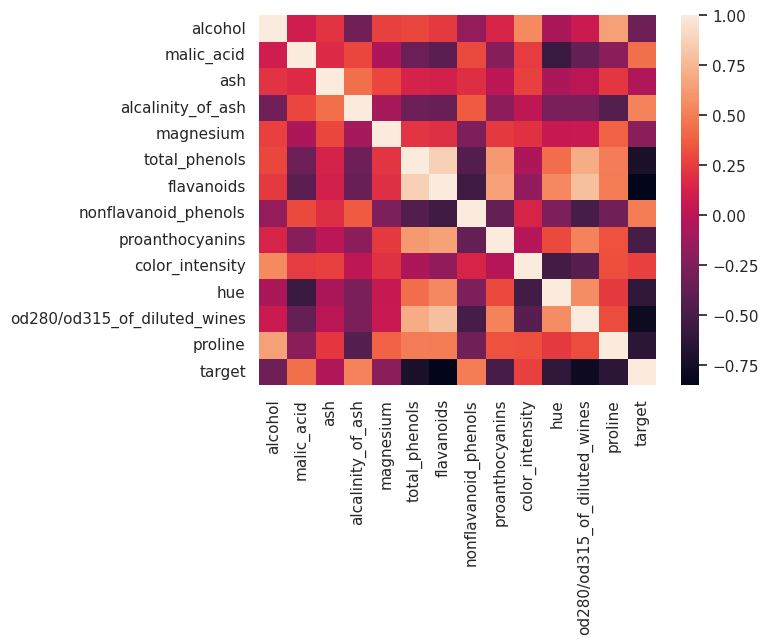

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df.corr())
plt.show()

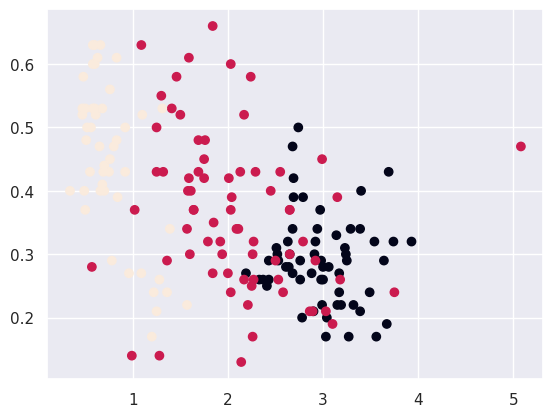

In [121]:
plt.scatter(x = df.flavanoids, y = df.nonflavanoid_phenols, c = df.target)
plt.show()

### 데이터 전처리하기

In [ ]:
# 데이터 타입을 확인하세요

In [98]:
df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                            int64
dtype: object

In [ ]:
# 결측치를 확인하세요

In [100]:
df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [ ]:
# 인코딩

In [ ]:
# 스케일링

In [101]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x = pd.DataFrame(data.data, columns = data.feature_names)

scaled_x = scaler.fit_transform(x)

In [ ]:
# 그 외

In [110]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, data.target)

### 모델링

In [111]:
from sklearn.linear_model import LogisticRegression

logi = LogisticRegression(max_iter=5000)

model = logi.fit(x_train, y_train)

### 모델 평가

In [122]:
model.score(x_test, y_test)

0.9333333333333333

In [123]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [125]:
accuracy_score(y_test, model.predict(x_test))

0.9333333333333333

In [128]:
precision_score(y_test, model.predict(x_test), average = 'macro')

0.9351851851851851

In [129]:
recall_score(y_test, model.predict(x_test), average = 'macro')

0.9411764705882352